In [1]:
import bagpy
from bagpy import bagreader

ModuleNotFoundError: No module named 'bagpy'

/tmp/ipykernel_44800/1534716343.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(byte_string, np.uint8)


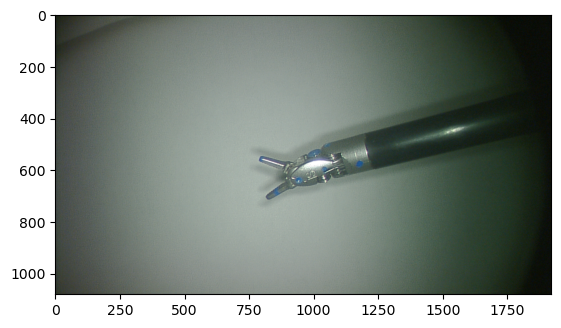

In [31]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import cv2
import math
from scipy.cluster.hierarchy import fclusterdata

df_left_image = pd.read_csv('../journal_dataset/stereo-left-image.csv', nrows = 10)
df_left_image.head()
raw_string = df_left_image['data'][0]

byte_string = raw_string[2:-1].encode('latin1')
escaped_string = byte_string.decode('unicode_escape')
byte_string = escaped_string.encode('latin1')
nparr = np.fromstring(byte_string, np.uint8)
rgb = nparr.reshape((1080, 1920, -1))
plt.imshow(rgb)


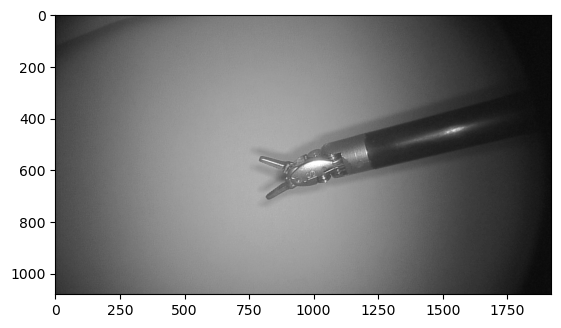

In [20]:
grey = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap = 'gray')

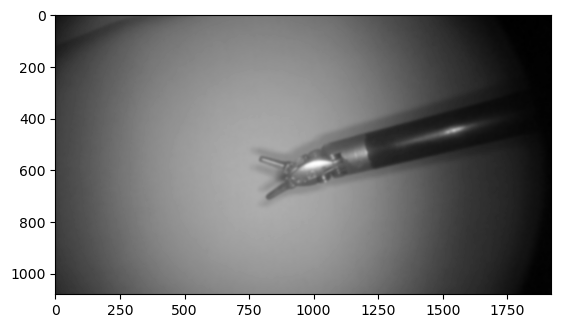

In [21]:
blur = cv2.GaussianBlur(grey, ksize=(25,25), sigmaX=0)
plt.imshow(blur, cmap = 'gray')

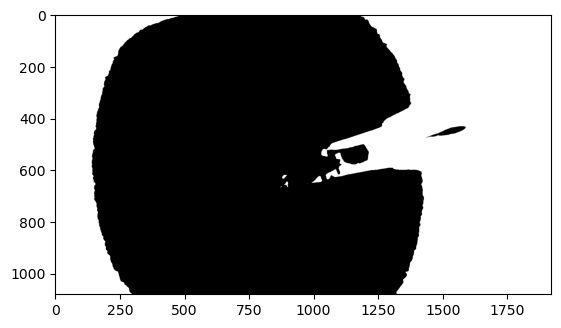

In [22]:

thresh, mask = cv2.threshold(blur, thresh = 150, maxval = 175, type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(mask, cmap = 'gray')

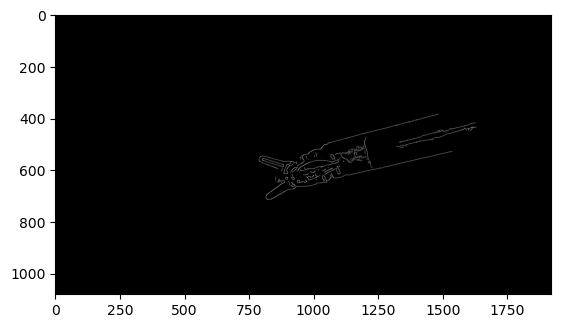

In [23]:
edges = cv2.Canny(blur, threshold1 = 200, threshold2 = 255, apertureSize = 5, L2gradient = True)
plt.imshow(edges, cmap = 'gray')


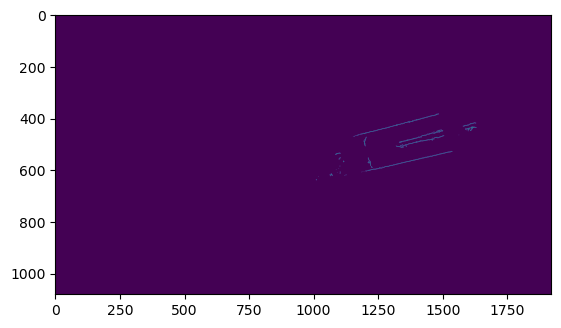

In [29]:
edges_and_mask = cv2.bitwise_and(edges, mask)
plt.imshow(edges_and_mask)


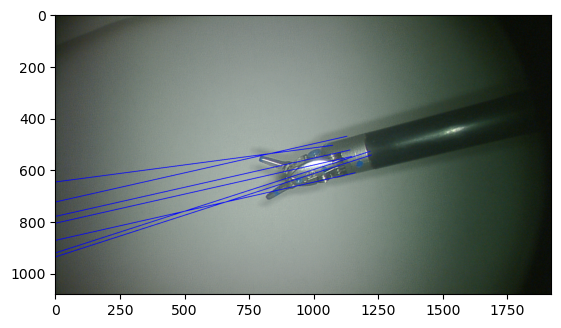

In [32]:

lines = cv2.HoughLinesWithAccumulator(edges_and_mask, rho = 5, theta = 0.09, threshold = 100) 
lines = np.squeeze(lines)
# sort by max votes
sorted_lines = lines[(-lines[:, 2]).argsort()]
for i in range(sorted_lines.shape[0]):
    rho = sorted_lines[i, 0]
    theta = sorted_lines[i, 1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(rgb, pt1, pt2, (0,0,255), 2)
plt.imshow(rgb)


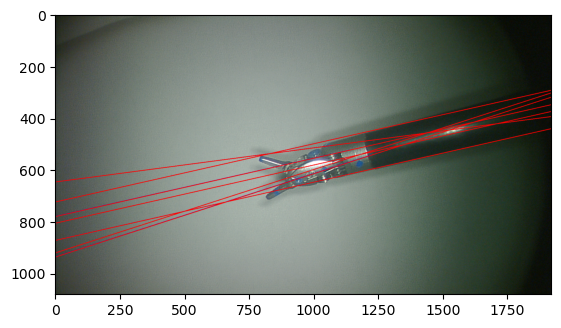

In [33]:

rho_clusters = fclusterdata(sorted_lines[:, 0].reshape(-1, 1), t = 5, criterion = 'distance', method = 'complete')
theta_clusters = fclusterdata(sorted_lines[:, 1].reshape(-1, 1), t = 0.09, criterion = 'distance', method = 'complete')

best_lines = []
checked_clusters = []
for i in range(sorted_lines.shape[0]):
    rho_cluster = rho_clusters[i]
    theta_cluster = theta_clusters[i]
    cluster = (rho_cluster, theta_cluster)
    if (cluster in checked_clusters):
        continue
    best_lines.append([lines[i, 0], lines[i, 1]])
    checked_clusters.append(cluster)

best_lines = np.asarray(best_lines)

for i in range(best_lines.shape[0]):
    rho = best_lines[i, 0]
    theta = best_lines[i, 1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
    pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
    cv2.line(rgb, pt1, pt2, (255,0,0), 2)
plt.imshow(rgb)

In [1]:
import yaml
import os
import numpy as np


# construct node
def opencv_matrix(loader, node):
    mapping = loader.construct_mapping(node, deep=True)
    mat = np.array(mapping["data"])
    mat.resize(mapping["rows"], mapping["cols"])
    return mat
yaml.add_constructor(u"tag:yaml.org,2002:opencv-matrix", opencv_matrix)

# loading
with open('journal_dataset/camera_calibration.yaml') as fin:
    c = fin.read()
    # some operator on raw conent of c may be needed
    c = "%YAML 1.1"+os.linesep+"---" + c[len("%YAML:1.0"):] if c.startswith("%YAML:1.0") else c
    result = yaml.full_load(c)

In [3]:
# loading
with open('journal_dataset/handeye.yaml') as fin:
    c = fin.read()
    # some operator on raw conent of c may be needed
    c = "%YAML 1.1"+os.linesep+"---" + c[len("%YAML:1.0"):] if c.startswith("%YAML:1.0") else c
    result = yaml.full_load(c)

In [7]:
# loading
with open('journal_dataset/camera_calibration.yaml') as fin:
    c = fin.read()
    # some operator on raw conent of c may be needed
    c = "%YAML 1.1"+os.linesep+"---" + c[len("%YAML:1.0"):] if c.startswith("%YAML:1.0") else c
    result = yaml.full_load(c)